## Texture plugin analysis example

This exercise shows how to use the texture plugin, CrysText, together with NCrystal. In this example, the modifications to the coherent elastic cross-section are included in the NCrystal plugin.

The coherent scattering cross-section is given by,
\begin{equation}
\sigma_{\textrm{coh}}^{\textrm{el}}(\lambda)=\dfrac{\lambda^{2}}{2V}\sum_{hkl}^{\lambda\leq 2d_{hkl}}d_{hkl}|F_{hkl}|^{2}P_{hkl}(\lambda,d_{hkl}),
\end{equation}
where $P_{hkl}(\lambda,d_{hkl})$ is the modified
March-Dollase preferred orientation distribution function, which uses an axially symmetric orientation distribution around the beam
direction. The calculation is perferormed as described in Sato et al. [1] and is given by
\begin{equation}
P_{hkl}(\lambda,d_{hkl})=\frac{1}{2\pi}\int^{2\pi}_0 \left( R^2B_{hkl}^2 +\frac{1-B_{hkl}^2}{R}\right)^{-3/2}d\phi.
\end{equation}
This plugin should only be used to generate cross-sections, and not to sample scattering events.

[1] H. Sato, T. Kamiyama, and Y. Kiyanagi, Materials Transactions 52 (2011) 1294
, http://dx.doi.org/10.2320/matertrans.M2010328

## Preamble
Install NCrystal with pip.

In [1]:
#By default we only do pip installs on Google Colab, but you
#can set the variable in the next line to True if you need it:
always_do_pip_installs = False
try:
    import google.colab as google_colab
except ModuleNotFoundError:
    google_colab=None#not on google colab
if always_do_pip_installs or google_colab:
    %pip install -q ncrystal[all] ipympl pandas pickleshare
#enable inline and interactive matplotlib plots:
if google_colab:
    google_colab.output.enable_custom_widget_manager()
    %matplotlib inline
else:
    %matplotlib ipympl
import matplotlib
matplotlib.rcParams.update({"figure.autolayout": True})

## Install the plugin
Get the plugin CrysText and other dependencies. If we didn't know already how to do that, we could have found the plugin on https://github.com/mctools/ncrystal/wiki/CuratedPlugins.

Note that since we did not yet do an `import NCrystal` at this point in the notebook, we do **not** have to restart the kernel afterwards even though there might be a warning printed below about that.

In [2]:
%pip install "git+https://github.com/highness-eu/ncplugin-CrysText"

  Cloning https://github.com/highness-eu/ncplugin-CrysText to /tmp/pip-req-build-dw314khl
  Running command git clone --filter=blob:none --quiet https://github.com/highness-eu/ncplugin-CrysText /tmp/pip-req-build-dw314khl
  Resolved https://github.com/highness-eu/ncplugin-CrysText to commit 276f662f19df9f1acd2eeb66a8296ddd0332db67
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached ncrystal_pypluginmgr-0.0.5-py3-none-any.whl.metadata (14 kB)
Using cached ncrystal_pypluginmgr-0.0.5-py3-none-any.whl (13 kB)
  Created wheel for ncrystal-plugin-CrysText: filename=ncrystal_plugin_crystext-0.0.1-py3-none-linux_x86_64.whl size=46133 sha256=1f8cc9095c020cd9068c5e36415c008cab833be3426bf21be81558f62efe7f57
  Stored in directory: /tmp/pip-ephem-wheel-cache-jv9phcv9/wheels/41/47/e0/feccec0502090ff282cc5d41dbbb7c49fb0c126595b8323c94
Successfully built ncrystal-plugin-CrysText
Note: you may need to rest

Check that the plugin is indeed recognised by NCrystal:

In [3]:
!nctool --plugins

NCrystal has 9 plugins loaded.
==> stddatasrc (builtin)
==> stdscat (builtin)
==> stdmpscat (builtin)
==> stdexpscat (builtin)
==> stdlaz (builtin)
==> stdabs (builtin)
==> stdncmat (builtin)
==> stdquick (builtin)
==> CrysText (dynamic from /some/where/ncrystal-notebooks/venv/lib/python3.12/site-packages/ncrystal_plugin_CrysText/plugins/libNCPlugin_CrysText.so)


We can now finally import NCrystal. And also note that we can check the plugin is available via the Python API:

In [4]:
#always import NCrystal:
import NCrystal as NC
assert NC.version_num >=  4000000, "too old NCrystal found"
NC.test() #< quick unit test that installation works
NC.browsePlugins(dump=True) # dump=True means we print the list

Tests completed succesfully
NCrystal has 9 plugins loaded.
==> stddatasrc (builtin)
==> stdscat (builtin)
==> stdmpscat (builtin)
==> stdexpscat (builtin)
==> stdlaz (builtin)
==> stdabs (builtin)
==> stdncmat (builtin)
==> stdquick (builtin)
==> CrysText (dynamic from /some/where/ncrystal-notebooks/venv/lib/python3.12/site-packages/ncrystal_plugin_CrysText/plugins/libNCPlugin_CrysText.so)


# Using the plugin
Let's create a file and set the parameters of the model.

This is done by taking an existing file and adding the relevant section for the new physics through using "c.set_custom_section_data()".
The name of the pluggin is `CRYSTEXT` followed by the data used by the model. The `CRYSTEXT` plugin currently supports two March-Dollase functions with a given weight.

On each line, the first three numbers represent the hkl values of the preferred orientation axis, the fourth number is $R$, the degree of anistotropy, and the fifth is the weight. The data is added to the section called `@CUSTOM_CRYSTEXT`.

In [5]:
import pathlib
import numpy as np
import pandas
import matplotlib.pyplot as plt

c = NC.NCMATComposer('Zr_sg194.ncmat')
# Set hkl, R and fraction
c.set_custom_section_data("CRYSTEXT", " 0  0  2  0.465 0.5 \n 0  0  2  0.465 0.5 ")
c.write('Zr_sg225-CrysText.ncmat')
print( pathlib.Path('Zr_sg225-CrysText.ncmat').read_text())

NCMAT v7
# Autogenerated by NCMATComposer
#
# Zr (hexagonal, SG-194)
#
# Atoms per unit cell: 2xZr
#
# NOTICE: crystal structure was verified with spglib to be self-consistent.
#
@CELL
  lengths 3.232 !! 5.147
  angles 90 90 120
@SPACEGROUP
  194
@ATOMPOSITIONS
  Zr 1/3 2/3 1/4
  Zr 2/3 1/3 3/4
@CUSTOM_CRYSTEXT
  0  0  2  0.465 0.5
  0  0  2  0.465 0.5
@DYNINFO
  # Transferred from "Zr" in existing NCrystal.DynamicInfo object
  element Zr
  fraction 1
  type vdos
  vdos_egrid .00188884 .0229022
  vdos_density .00580803 .00699617 .00673608 .00416859 .00354729 .00362673
     .00450489 .00710242 .00970558 .00996095 .0104084 .011033 .0126313 .0150165
     .0172456 .019314 .0210789 .0210557 .0197406 .0180921 .0163888 .0143851
     .0123014 .00998849 .00884003 .00879537 .0107318 .0140536 .019036 .0230005
     .0265534 .0292249 .0303077 .0292462 .0247515 .0193833 .0153172 .0133485
     .0156425 .0187844 .0231609 .0271647 .0302139 .0328087 .0348181 .0364424
     .0379672 .039688 .0414352 .0444

Compare against the ideal Zr cross-section.

NCrystal WARNING: Loading NCMAT data which has @CUSTOM_ section(s). This is OK if intended.


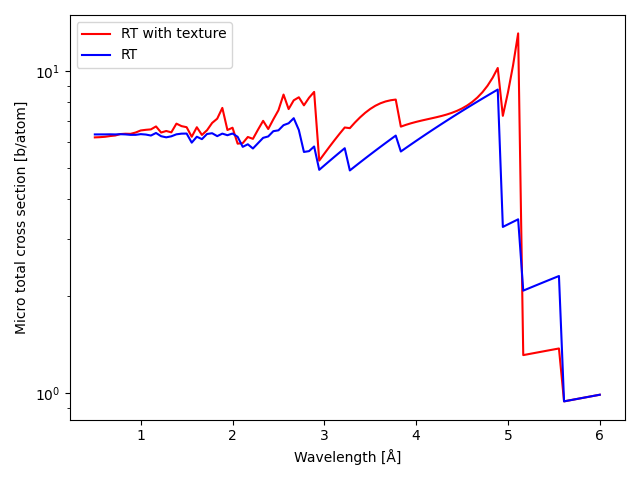

In [6]:
wl = np.linspace(0.5, 6, 100)

# Definition of the material requires the single-crystal information to be defined, however it is not used.
cfg1 = 'Zr_sg225-CrysText.ncmat;dir1=@crys_hkl:1,1,1@lab:1,0,0;dir2=@crys_hkl:0,0,2@lab:0,1,0;mos=1deg;dirtol=180deg'
pc = NC.createScatter( cfg1)
pc_a=NC.createAbsorption(cfg1)
xs1 = pc.crossSection(NC.wl2ekin(wl),direction=(0,0,1))+pc_a.xsect(wl=wl)

cfg2 = 'Zr_sg194.ncmat'
pc = NC.createScatter( cfg2)
pc_a=NC.createAbsorption(cfg2)
xs2 = pc.xsect(wl=wl)+pc_a.xsect(wl=wl)

plt.figure()
plt.plot(wl, xs1, 'r-', label='RT with texture')
plt.plot(wl, xs2, 'b-', label='RT')
plt.legend()
plt.yscale("log")
plt.xlabel('Wavelength [Å]')
plt.ylabel('Micro total cross section [b/atom]')
plt.show()

## Exercise #1
Compare the total cross section data for Al, using the plugin, with experimental data from the IAEA database [EXFOR](https://www-nds.iaea.org/exfor/). We will access the experimental data using the [Web API](https://www-nds.iaea.org/exfor/x4guide/API/). Can you adjust the parameters of the model to match the measured data?

Modify this cell to compare the experimental data with NCrystal results.

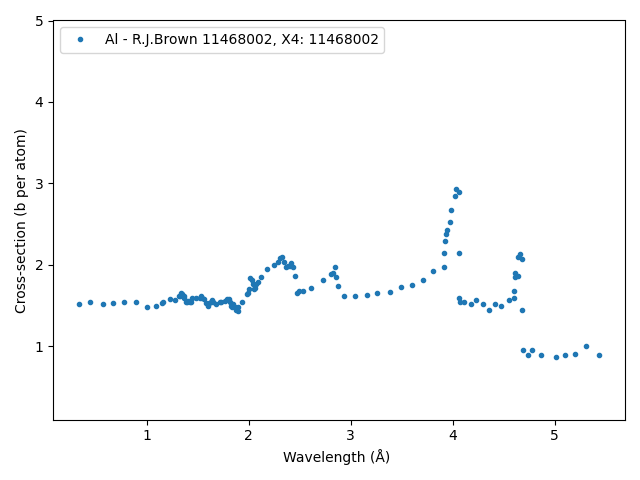

In [7]:
from urllib.request import urlopen, Request
import pandas as pd
import io
x4ids = [11468002]
x4label = ['Al - R.J.Brown 11468002']

fig, ax = plt.subplots()

#for x4id in x4ids:
for i, x4id in enumerate(x4ids):
    req = Request(
        url=f'https://nds.iaea.org/exfor/x4get?DatasetID={x4id}&op=csv',
        data=None,
        headers={
            'User-Agent': 'Mozilla/5.0 (X11; Fedora; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
        }
    )
    with urlopen(req) as f:
        df = pd.read_csv(io.StringIO(f.read().decode('utf-8')))
    if 'EN (EV) 1.1' in list(df):
        x4_E, x4_xs = df['EN (EV) 1.1'].values, df['DATA (B) 0.1'].values
    elif 'EN (MEV) 1.1' in list(df):
        x4_E, x4_xs = 1e6*df['EN (MEV) 1.1'].values, df['DATA (B) 0.1'].values

    if (i==0):
      ax.plot(NC.ekin2wl(x4_E), x4_xs, '.', label=x4label[i]+ f', X4: {x4id}')
    else:
      ax.plot(NC.ekin2wl(x4_E), x4_xs, '.', label=x4label[i]+ f', X4: {x4id}')

ax.legend(loc='upper left')
ax.set_ylim(0.1,5)
ax.set_xlabel("Wavelength (Å) ")
ax.set_ylabel("Cross-section (b per atom)")
plt.show()
